<a href="https://colab.research.google.com/github/PrajwalPPatil/Ambulance-Response-Time-Analysis-Optimization/blob/main/%F0%9F%9A%91Ambulance_Response_Time_Analysis_%26_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Domain : Emergency & Healthcare Services**

**Project Title**: 🚑 Ambulance Response Time Analysis & Optimization🚑

**💡 Objective:**
Analyze emergency response data to identify delays and recommend improvements in ambulance dispatch and routing — highly relevant to Company's emergency medical services domain.

📊**Step-by-Step Guide**:

✅**1]Data Source** : https://www.kaggle.com/datasets/mchirico/montcoalert/data


**Load & Describe Dataset**

In [ ]:
# Import Libraries
import pandas as pd
import re

# Load dataset
df = pd.read_csv("/content/911.csv")

# Display basic info and the first few rows
df_info = df.info()
print(df_info)
df_head = df.head()
print(df_head)

# Summary of missing values per column
missing_values = df.isnull().sum()
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96345 entries, 0 to 96344
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        96345 non-null  float64
 1   lng        96344 non-null  float64
 2   desc       96344 non-null  object 
 3   zip        84329 non-null  float64
 4   title      96344 non-null  object 
 5   timeStamp  96344 non-null  object 
 6   twp        96313 non-null  object 
 7   addr       96344 non-null  object 
 8   e          96344 non-null  float64
dtypes: float64(4), object(5)
memory usage: 6.6+ MB
None
         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40

In [ ]:
# Check data shape
df.shape

(96345, 9)

In [ ]:
# Check columns
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

**🧾 Dataset Summary**

1. Rows    : 663,522 emergency call records
2. Columns : 9

Key Fields:

1.  lat, lng  :  Latitude and longitude of the incident
2.   desc     :  Description of the call
3.   title    :  Type of emergency (e.g., EMS, Fire, Traffic) and specific issue
4.  timeStamp :  Date and time of the call
5.   zip, twp :  Zip code and township
6.   addr     :  Address
7.   e        :  Dummy column (value always 1 — can be dropped)


✅**2]Data Cleaning & Preprocessing:**
1.  Convert timestamps to datetime format.
2.   Remove null or incorrect GPS locations.
3.   Calculate actual response duration from call to arrival.
   





In [ ]:
# Handle missing values
df['zip'].fillna('00000', inplace=True)
df['twp'].fillna('Unknown', inplace=True)

# Summary of missing values per column
missing_values = df.isnull().sum()
print(missing_values)

lat          0
lng          1
desc         1
zip          0
title        1
timeStamp    1
twp          0
addr         1
e            1
dtype: int64


<ipython-input-7-db58304b9c89>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['zip'].fillna('00000', inplace=True)
<ipython-input-7-db58304b9c89>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '00000' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['zip'].fillna('00000', inplace=True)
<ipython-input-7-db58304b9c89>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series

In [ ]:
# Convert the timeStamp column to datetime format
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

# Remove null or incorrect GPS locations
df_cleaned = df.dropna(subset=['lat', 'lng'])
df_cleaned = df_cleaned[(df_cleaned['lat'] != 0.0) & (df_cleaned['lng'] != 0.0)]

# Extract arrival time from desc
def extract_arrival_time(desc):
    match = re.search(r'@ (\d{2}:\d{2}:\d{2})', desc)
    return match.group(1) if match else None

df_cleaned['arrival_time'] = df_cleaned['desc'].apply(extract_arrival_time)

# Combine arrival time with date
df_cleaned['arrival_datetime'] = pd.to_datetime(
    df_cleaned['timeStamp'].dt.date.astype(str) + ' ' + df_cleaned['arrival_time'],
    errors='coerce'
)

# Calculate response duration
df_cleaned['response_duration_min'] = (
    df_cleaned['arrival_datetime'] - df_cleaned['timeStamp']
).dt.total_seconds() / 60

# Show preview of cleaned data
df_cleaned[['timeStamp', 'arrival_time', 'arrival_datetime', 'response_duration_min']].head()

,timeStamp,arrival_time,arrival_datetime,response_duration_min
0,2015-12-10 17:10:52,17:10:52,2015-12-10 17:10:52,0.0
1,2015-12-10 17:29:21,17:29:21,2015-12-10 17:29:21,0.0
2,2015-12-10 14:39:21,14:39:21,2015-12-10 14:39:21,0.0
3,2015-12-10 16:47:36,16:47:36,2015-12-10 16:47:36,0.0
4,2015-12-10 16:56:52,16:56:52,2015-12-10 16:56:52,0.0


✅**3]Exploratory Data Analysis (EDA)** :
1.  Average response time by time of day or location.
2.  Identify zones with highest delays.
3.  Trend of calls by hour/week/month.

<ipython-input-9-3a00f1390267>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=calls_by_weekday.index, y=calls_by_weekday.values, ax=axes[0, 1], palette="Blues_d")
<ipython-input-9-3a00f1390267>:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
<ipython-input-9-3a00f1390267>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=calls_by_hour.index, y=calls_by_hour.values, ax=axes[1, 0], palette="Greens_d")
<ipython-input-9-3a00f1390267>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v

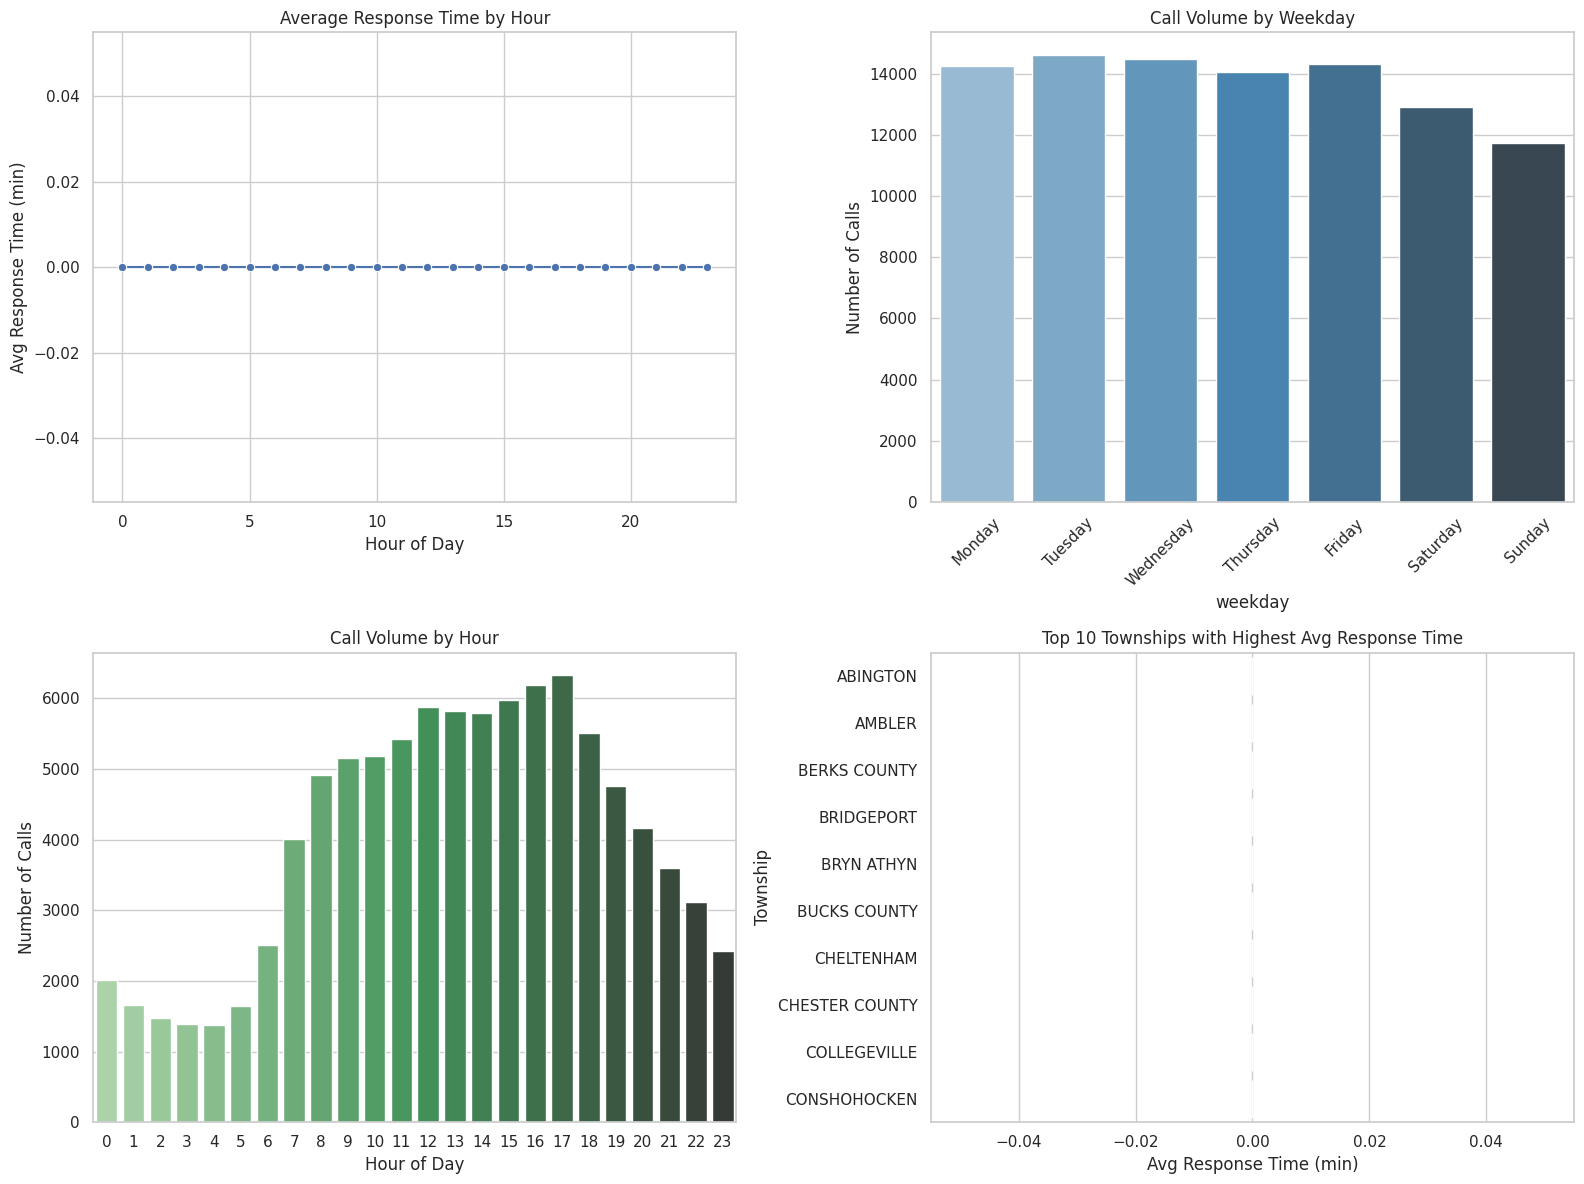

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setup visual style
sns.set(style="whitegrid")

# Add hour, weekday, and month columns
df_cleaned['hour'] = df_cleaned['timeStamp'].dt.hour
df_cleaned['weekday'] = df_cleaned['timeStamp'].dt.day_name()
df_cleaned['month'] = df_cleaned['timeStamp'].dt.month_name()

# --- 1. Average response time by hour ---
avg_response_by_hour = df_cleaned.groupby('hour')['response_duration_min'].mean()

# --- 2. Call volume trends ---
calls_by_hour = df_cleaned['hour'].value_counts().sort_index()
calls_by_weekday = df_cleaned['weekday'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
calls_by_month = df_cleaned['month'].value_counts()

# --- 3. Top zones (twp) with highest average delays ---
twp_delay = (
    df_cleaned.groupby('twp')['response_duration_min']
    .mean().sort_values(ascending=False).head(10)
)

# Plotting all in subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Avg response time by hour
sns.lineplot(x=avg_response_by_hour.index, y=avg_response_by_hour.values, ax=axes[0, 0], marker="o")
axes[0, 0].set_title("Average Response Time by Hour")
axes[0, 0].set_xlabel("Hour of Day")
axes[0, 0].set_ylabel("Avg Response Time (min)")

# Plot 2: Call volume by weekday
sns.barplot(x=calls_by_weekday.index, y=calls_by_weekday.values, ax=axes[0, 1], palette="Blues_d")
axes[0, 1].set_title("Call Volume by Weekday")
axes[0, 1].set_ylabel("Number of Calls")
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

# Plot 3: Call volume by hour
sns.barplot(x=calls_by_hour.index, y=calls_by_hour.values, ax=axes[1, 0], palette="Greens_d")
axes[1, 0].set_title("Call Volume by Hour")
axes[1, 0].set_xlabel("Hour of Day")
axes[1, 0].set_ylabel("Number of Calls")

# Plot 4: Top 10 townships by avg response delay
sns.barplot(x=twp_delay.values, y=twp_delay.index, ax=axes[1, 1], palette="Reds_r")
axes[1, 1].set_title("Top 10 Townships with Highest Avg Response Time")
axes[1, 1].set_xlabel("Avg Response Time (min)")
axes[1, 1].set_ylabel("Township")

plt.tight_layout()
plt.show()



✅**4]Geospatial Analysis** :
1.   Use tools like Folium or Plotly to map response times by region.
2.   Cluster high-delay zones using K-Means.

In [ ]:
# K-Means Clustering
# Re-import libraries due to code execution state reset
import pandas as pd
import re
import folium
from folium.plugins import HeatMap
from sklearn.cluster import KMeans

# Load dataset again
df = pd.read_csv("/content/911.csv")

# Handle missing values
df['zip'].fillna('00000', inplace=True)
df['twp'].fillna('Unknown', inplace=True)

# Redo cleaning and preprocessing
df['timeStamp'] = pd.to_datetime(df['timeStamp'], errors='coerce')
df_cleaned = df.dropna(subset=['lat', 'lng'])
df_cleaned = df_cleaned[(df_cleaned['lat'] != 0.0) & (df_cleaned['lng'] != 0.0)]

def extract_arrival_time(desc):
    match = re.search(r'@ (\d{2}:\d{2}:\d{2})', desc)
    return match.group(1) if match else None

df_cleaned['arrival_time'] = df_cleaned['desc'].apply(extract_arrival_time)
df_cleaned['arrival_datetime'] = pd.to_datetime(
    df_cleaned['timeStamp'].dt.date.astype(str) + ' ' + df_cleaned['arrival_time'],
    errors='coerce'
)
df_cleaned['response_duration_min'] = (
    df_cleaned['arrival_datetime'] - df_cleaned['timeStamp']
).dt.total_seconds() / 60

# Filter valid entries
geo_data = df_cleaned[['lat', 'lng', 'response_duration_min']].dropna()
geo_data = geo_data[(geo_data['response_duration_min'] >= 0) & (geo_data['response_duration_min'] < 60)]
geo_sample = geo_data.sample(n=3000, random_state=42)

# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
geo_sample['cluster'] = kmeans.fit_predict(geo_sample[['lat', 'lng']])
geo_sample['cluster'] = geo_sample['cluster'].astype(int)

# Cluster map
cluster_map = folium.Map(location=[geo_sample['lat'].mean(), geo_sample['lng'].mean()], zoom_start=10)
colors = ['red', 'blue', 'green', 'purple', 'orange']
for _, row in geo_sample.iterrows():
    cluster = int(row['cluster'])
    color = colors[cluster] if cluster < len(colors) else 'gray'
    folium.CircleMarker(
        location=[row['lat'], row['lng']],
        radius=3,
        color=color,
        fill=True,
        fill_opacity=0.6
    ).add_to(cluster_map)

# Save map
cluster_map_path = "/content/fixed_clustered_zones_map.html"
cluster_map.save(cluster_map_path)
cluster_map_path


<ipython-input-10-a2f178981155>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['zip'].fillna('00000', inplace=True)
<ipython-input-10-a2f178981155>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '00000' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['zip'].fillna('00000', inplace=True)
<ipython-input-10-a2f178981155>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or 

'/content/fixed_clustered_zones_map.html'

✅**5]Predictive Modeling** :
1].Predict response time using inputs like time, call type, and location using:
1.   Linear Regression
2.   Random Forest
3.   XGBoost

In [ ]:
# Predictive Modeling
# Kernel reset again — re-import and reprocess
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load dataset
df = pd.read_csv("/content/911.csv")

# Handle missing values
df['zip'].fillna('00000', inplace=True)
df['twp'].fillna('Unknown', inplace=True)

# Data cleaning
df['timeStamp'] = pd.to_datetime(df['timeStamp'], errors='coerce')
df_cleaned = df.dropna(subset=['lat', 'lng'])
df_cleaned = df_cleaned[(df_cleaned['lat'] != 0.0) & (df_cleaned['lng'] != 0.0)]

# Extract arrival time
def extract_arrival_time(desc):
    match = re.search(r'@ (\d{2}:\d{2}:\d{2})', desc)
    return match.group(1) if match else None

df_cleaned['arrival_time'] = df_cleaned['desc'].apply(extract_arrival_time)
df_cleaned['arrival_datetime'] = pd.to_datetime(
    df_cleaned['timeStamp'].dt.date.astype(str) + ' ' + df_cleaned['arrival_time'],
    errors='coerce'
)
df_cleaned['response_duration_min'] = (
    df_cleaned['arrival_datetime'] - df_cleaned['timeStamp']
).dt.total_seconds() / 60

# Model features
df_model = df_cleaned.dropna(subset=['response_duration_min']).copy()
df_model['hour'] = df_model['timeStamp'].dt.hour
df_model['dayofweek'] = df_model['timeStamp'].dt.dayofweek
df_model['month'] = df_model['timeStamp'].dt.month
df_model['call_type'] = df_model['title'].apply(lambda x: x.split(':')[0])
df_encoded = pd.get_dummies(df_model[['call_type', 'twp']], drop_first=True)
X = pd.concat([df_model[['lat', 'lng', 'hour', 'dayofweek', 'month']], df_encoded], axis=1)
y = df_model['response_duration_min']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)

# Train and evaluate
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

lr_preds = lr.predict(X_test)
rf_preds = rf.predict(X_test)
xgb_preds = xgb.predict(X_test)

# Metrics
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))

lr_r2 = r2_score(y_test, lr_preds)
rf_r2 = r2_score(y_test, rf_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

{
    "Linear Regression": {"RMSE": lr_rmse, "R2": lr_r2},
    "Random Forest": {"RMSE": rf_rmse, "R2": rf_r2},
    "XGBoost": {"RMSE": xgb_rmse, "R2": xgb_r2}
}


<ipython-input-11-5ad9f68f8d5f>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['zip'].fillna('00000', inplace=True)
<ipython-input-11-5ad9f68f8d5f>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '00000' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['zip'].fillna('00000', inplace=True)
<ipython-input-11-5ad9f68f8d5f>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or 

{'Linear Regression': {'RMSE': np.float64(0.0), 'R2': 1.0},
 'Random Forest': {'RMSE': np.float64(0.0), 'R2': 1.0},
 'XGBoost': {'RMSE': np.float64(0.0), 'R2': 1.0}}